# Demo of khipu

This notebook is run on $docker run -v /Users/shuzhao/play:/home/jovyan -p 8888:8888 jupyter/scipy-notebook

Shuzhao Li, 2022-12-15

In [1]:
!pip install --upgrade khipu-metabolomics

  Found existing installation: khipu-metabolomics 0.3.3
    Uninstalling khipu-metabolomics-0.3.3:
      Successfully uninstalled khipu-metabolomics-0.3.3


In [2]:
import matplotlib.pyplot as plt
from khipu.test import *

In [3]:
# Variables imported
print([x for x in dir() if x[0] != '_'])

['In', 'Out', 'add_data_to_tag', 'adduct_search_patterns', 'adduct_search_patterns_neg', 'assign_masstrack_ids_in_khipu', 'build_centurion_tree', 'exit', 'export_empCpd_khipu_list', 'export_json_khipu_list', 'export_json_trees', 'export_tsv_trees', 'extend_khipu_list', 'extended_adducts', 'find_all_matches_centurion_indexed_list', 'find_trees_by_datatag', 'find_trees_by_datatag_list', 'get_adduct_edge_pairs', 'get_ipython', 'get_isotope_pattern_name', 'get_isotopic_edge_pairs', 'is_datatag_in_tree', 'isotope_search_patterns', 'json', 'khipu', 'khipu_annotate', 'khipu_diagnosis', 'make_edge_tag', 'make_peak_dict', 'make_peak_tag', 'np', 'nx', 'pd', 'peak_dict_to_khipu_list', 'peaks_to_networks', 'plt', 'quit', 'read_features_from_text', 'realign_isotopes', 'realign_isotopes_reverse', 'rt_compared_by_values', 'rt_matched_by_tolerance', 'test_read_file', 'test_read_url', 'treelib', 'urllib']


In [4]:
# Read test feature table into khipu package

subnetworks, peak_dict, edge_dict = test_read_url()

print(len(subnetworks), len(peak_dict))

Retrieving test data from GitHub.
table headers ordered:  mz rtime
Read 4016 feature lines
681 4016


In [5]:
# Have a look at peak data structure

print(list(peak_dict.items())[55:57])

[('F56', {'id': 'F56', 'mz': 119.0725, 'rtime': 151.44, 'intensities': [526144.0, 0.0, 0.0, 0.0], 'representative_intensity': 131536.0}), ('F57', {'id': 'F57', 'mz': 119.0834, 'rtime': 128.05, 'intensities': [469938.0, 0.0, 681936.0, 288568.0], 'representative_intensity': 360110.5})]


In [6]:
# Have a look at default ion patterns

print(isotope_search_patterns)

print(adduct_search_patterns)

[(1.003355, '13C/12C', (0, 0.8)), (2.00671, '13C/12C*2', (0, 0.8)), (3.010065, '13C/12C*3', (0, 0.8)), (4.01342, '13C/12C*4', (0, 0.8)), (5.016775, '13C/12C*5', (0, 0.8)), (6.02013, '13C/12C*6', (0, 0.8)), (7.023485, '13C/12C*7', (0, 0.8)), (8.02684, '13C/12C*8', (0, 0.8)), (9.030195, '13C/12C*9', (0, 0.8)), (10.03355, '13C/12C*10', (0, 0.8)), (11.036905, '13C/12C*11', (0, 0.8)), (12.04026, '13C/12C*12', (0, 0.8))]
[(21.982, 'Na/H'), (41.026549, 'Acetonitrile'), (17.02655, 'NH3'), (35.9767, 'HCl'), (37.955882, 'K/H')]


(array([504., 104.,  36.,  13.,   7.,  10.,   6.]),
 array([ 2,  4,  6,  8, 10, 12, 20, 30]),
 <a list of 7 Patch objects>)

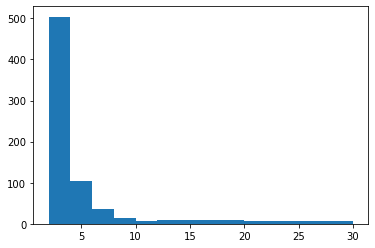

In [7]:
# distribution of input network sizes

sizes = [n.number_of_nodes() for n in subnetworks]
plt.hist(sizes, bins=[2, 4, 6, 8, 10, 12, 20, 30])

In [8]:
# choose one group to build demo khipu
for ii in range(20):
    print(ii, sizes[ii])

0 2
1 3
2 3
3 16
4 3
5 4
6 4
7 21
8 4
9 7
10 13
11 24
12 13
13 4
14 20
15 3
16 5
17 3
18 5
19 2


In [9]:
# subnetworks will have different numbers in each run. Here we choose a larger one for demo
subnetworks[7].edges()

EdgeView([('F1364', 'F773'), ('F1364', 'F774'), ('F1364', 'F396'), ('F874', 'F807'), ('F874', 'F808'), ('F874', 'F172'), ('F874', 'F207'), ('F3398', 'F194'), ('F3398', 'F195'), ('F3398', 'F396'), ('F3930', 'F481'), ('F3930', 'F807'), ('F3930', 'F808'), ('F3271', 'F20'), ('F3271', 'F53'), ('F3271', 'F254'), ('F3271', 'F396'), ('F3271', 'F562'), ('F808', 'F172'), ('F808', 'F207'), ('F808', 'F20'), ('F808', 'F3931'), ('F807', 'F172'), ('F807', 'F207'), ('F807', 'F20'), ('F807', 'F3931'), ('F562', 'F20'), ('F562', 'F254'), ('F562', 'F396'), ('F562', 'F3272'), ('F396', 'F20'), ('F396', 'F254'), ('F396', 'F3272'), ('F172', 'F207'), ('F195', 'F20'), ('F207', 'F481'), ('F481', 'F3931'), ('F3272', 'F20'), ('F3272', 'F254'), ('F194', 'F20'), ('F20', 'F53'), ('F20', 'F254')])

In [10]:
# Build khipu. The khipu_diagnosis class has a few extra functions than khipu main class

KP = khipu_diagnosis(subnetworks[7], isotope_search_patterns, adduct_search_patterns)
KP.build_khipu(peak_dict)


In [11]:
# Redundant features are set aside during khipu construction
KP.show_trimming()

nodes_to_use:  ['F1364', 'F874', 'F3398', 'F3931', 'F3271', 'F808', 'F774', 'F562', 'F396', 'F172', 'F195', 'F207', 'F481', 'F20', 'F254', 'F53']
redundant_nodes:  ['F3930', 'F3272', 'F807', 'F773', 'F194', 'F3931', 'F481']


In [12]:
# minimal tree view of the edges
KP.build_diagnostic_tree_clean()

Minimal khipu tree: 
77.0386@110.8
└── 83.0591@109.9
    └── 124.0851@110.6
        ├── 123.082@110.2
        │   ├── 118.0652@109.9
        │   │   └── 159.0917@110.4
        │   │       ├── 142.0653@110.4
        │   │       └── 160.0952@110.4
        │   │           ├── 168.1219@110.6
        │   │           └── 169.1253@110.6
        │   │               └── 152.0988@109.9
        │   ├── 119.0685@109.2
        │   ├── 122.0786@110.6
        │   └── 126.0922@110.4
        └── 141.111@110.6
            └── 132.0809@110.4



In [13]:
# the khipu in grid view
KP.print()

               B2 B2+Acetonitrile B3+NH3 B4+NH3
M0           F195             F20   F774   F808
13C/12C                       F53          F874
13C/12C*2                                      
13C/12C*3                                      
13C/12C*4                    F254              
13C/12C*5                   F3271              
13C/12C*6   F3398            F396  F1364       
13C/12C*7                                      
13C/12C*8                    F562              
13C/12C*9                                  F172
13C/12C*10                                 F207
13C/12C*11                                     
13C/12C*12                                     


In [14]:
# rotated view
KP.print2()

                   M0 13C/12C 13C/12C*2 13C/12C*3 13C/12C*4 13C/12C*5  \
B2               F195                                                   
B2+Acetonitrile   F20     F53                          F254     F3271   
B3+NH3           F774                                                   
B4+NH3           F808    F874                                           

                13C/12C*6 13C/12C*7 13C/12C*8 13C/12C*9 13C/12C*10 13C/12C*11  \
B2                  F3398                                                       
B2+Acetonitrile      F396                F562                                   
B3+NH3              F1364                                                       
B4+NH3                                             F172       F207              

                13C/12C*12  
B2                          
B2+Acetonitrile             
B3+NH3                      
B4+NH3                      


In [15]:
# This dataset have compounds that are 13C-glucose labelled
# Look at another compound
# KP = khipu_diagnosis(subnetworks[10], isotope_search_patterns, adduct_search_patterns)
# KP.build_khipu(peak_dict)


In [16]:
KP.build_diagnostic_tree_clean()

Minimal khipu tree: 
77.0386@110.8
└── 83.0591@109.9
    └── 124.0851@110.6
        ├── 123.082@110.2
        │   ├── 118.0652@109.9
        │   │   └── 159.0917@110.4
        │   │       ├── 142.0653@110.4
        │   │       └── 160.0952@110.4
        │   │           ├── 168.1219@110.6
        │   │           └── 169.1253@110.6
        │   │               └── 152.0988@109.9
        │   ├── 119.0685@109.2
        │   ├── 122.0786@110.6
        │   └── 126.0922@110.4
        └── 141.111@110.6
            └── 132.0809@110.4



In [17]:
# view via simple text, compatible with terminals
KP.print()

               B2 B2+Acetonitrile B3+NH3 B4+NH3
M0           F195             F20   F774   F808
13C/12C                       F53          F874
13C/12C*2                                      
13C/12C*3                                      
13C/12C*4                    F254              
13C/12C*5                   F3271              
13C/12C*6   F3398            F396  F1364       
13C/12C*7                                      
13C/12C*8                    F562              
13C/12C*9                                  F172
13C/12C*10                                 F207
13C/12C*11                                     
13C/12C*12                                     


In [18]:
# view via data frame, compatible with web browser
KP.khipu_grid

,B2,B2+Acetonitrile,B3+NH3,B4+NH3
M0,F195,F20,F774,F808
13C/12C,,F53,,F874
13C/12C*2,,,,
13C/12C*3,,,,
13C/12C*4,,F254,,
13C/12C*5,,F3271,,
13C/12C*6,F3398,F396,F1364,
13C/12C*7,,,,
13C/12C*8,,F562,,
13C/12C*9,,,,F172


In [19]:
KP.build_khipu_tree()

Aligned khipu tree: 
76
├── B0
│   ├── 132.0809@110.4
│   └── 141.111@110.6
├── B1
│   ├── 159.0917@110.4
│   ├── 160.0952@110.4
│   ├── 168.1219@110.6
│   └── 169.1253@110.6
├── B2
│   ├── 77.0386@110.8
│   └── 83.0591@109.9
└── B3
    ├── 118.0652@109.9
    ├── 119.0685@109.2
    ├── 122.0786@110.6
    ├── 123.082@110.2
    ├── 124.0851@110.6
    └── 126.0922@110.4



In [20]:
# Extended khipu with additional adducts
unassigned_peaks = [v for x,v in peak_dict.items() if x not in KP.nodes_to_use]
mztree =  build_centurion_tree(unassigned_peaks)
KP.extended_search(mztree, extended_adducts)
KP.print()

               B2 B2+Acetonitrile B3+NH3 B4+NH3 B3+NH3,HCN B4+NH3,HCOOH
M0           F195             F20   F774   F808       F807        F2462
13C/12C                       F53          F874                   F2638
13C/12C*2                                                              
13C/12C*3                                                              
13C/12C*4                    F254                                      
13C/12C*5                   F3271                                      
13C/12C*6   F3398            F396  F1364                               
13C/12C*7                                                              
13C/12C*8                    F562                                      
13C/12C*9                                  F172                   F1250
13C/12C*10                                 F207                   F1266
13C/12C*11                                                             
13C/12C*12                                                      

In [21]:
KP.annotation_dict

{'F195': ('M0', 'B2'),
 'F3398': ('13C/12C*6', 'B2'),
 'F396': ('13C/12C*6', 'B2+Acetonitrile'),
 'F3271': ('13C/12C*5', 'B2+Acetonitrile'),
 'F20': ('M0', 'B2+Acetonitrile'),
 'F254': ('13C/12C*4', 'B2+Acetonitrile'),
 'F53': ('13C/12C', 'B2+Acetonitrile'),
 'F562': ('13C/12C*8', 'B2+Acetonitrile'),
 'F774': ('M0', 'B3+NH3'),
 'F1364': ('13C/12C*6', 'B3+NH3'),
 'F207': ('13C/12C*10', 'B4+NH3'),
 'F874': ('13C/12C', 'B4+NH3'),
 'F808': ('M0', 'B4+NH3'),
 'F172': ('13C/12C*9', 'B4+NH3'),
 'F807': ('M0', 'B3+NH3,HCN'),
 'F1266': ('13C/12C*10', 'B4+NH3,HCOOH'),
 'F2638': ('13C/12C', 'B4+NH3,HCOOH'),
 'F2462': ('M0', 'B4+NH3,HCOOH'),
 'F1250': ('13C/12C*9', 'B4+NH3,HCOOH')}

In [22]:
KP.khipu_grid

,B2,B2+Acetonitrile,B3+NH3,B4+NH3,"B3+NH3,HCN","B4+NH3,HCOOH"
M0,F195,F20,F774,F808,F807,F2462
13C/12C,,F53,,F874,,F2638
13C/12C*2,,,,,,
13C/12C*3,,,,,,
13C/12C*4,,F254,,,,
13C/12C*5,,F3271,,,,
13C/12C*6,F3398,F396,F1364,,,
13C/12C*7,,,,,,
13C/12C*8,,F562,,,,
13C/12C*9,,,,F172,,F1250


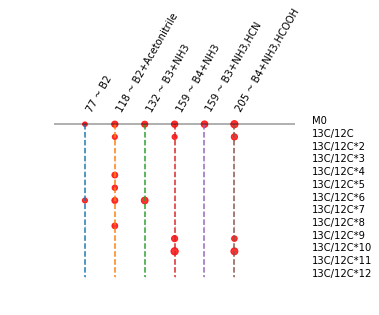

In [23]:
KP.plot_khipu_diagram()

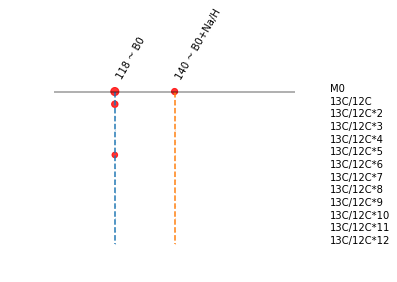

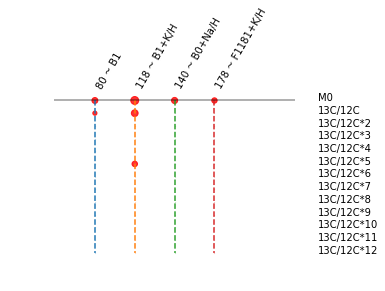

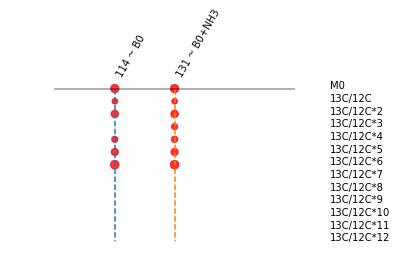

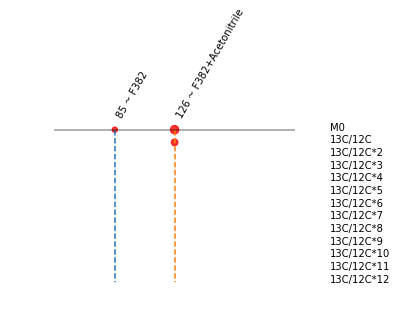

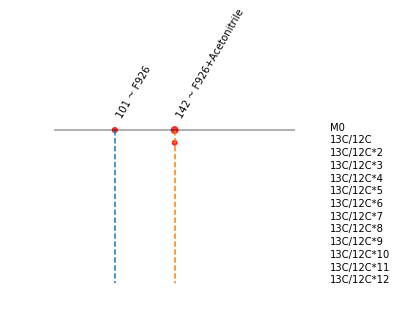

In [24]:
# plot a few more

for ii in range(8, 13):
    KP = khipu(subnetworks[ii], isotope_search_patterns, adduct_search_patterns)
    KP.build_khipu(peak_dict)
    KP.plot_khipu_diagram()

# Summary

This notebook demonstrates the internal data structures of khipu and basic visualization plots.